In [385]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import statsmodels.api as sd

In [2]:
#important column names
var_list = ['BIRTHYR', 'F1S76', 'F2S76', 'F1SEX', 'F1D63', 'F2D66', 'F1D6G', 'F2D9AF', 'BYS46', 'BYSES', 'BYFCOMP', 
            'BYS31A', 'BYS34A', 'BYS34B', 'EDEXPECT', 'BYS52', 'BYS51HC']

In [3]:
data = pd.read_csv('1994.csv', header = 0, dtype = str, usecols=var_list, chunksize=10000000)
df = pd.concat((x.query("F1SEX == '2'") for x in data), ignore_index=True)   # we focus on female

In [4]:
df.info

<bound method DataFrame.info of      BYS31A BYS34A BYS34B BYS46 BYS51HC BYS52 BIRTHYR   BYSES BYFCOMP F1S76  \
0         4      1      7     1       1     3      73  -0.859       1     2   
1         4      8      8     1       1    11      74  -0.191       1     2   
2         4      2      2     1       2     8      74  -0.319       1     2   
3         5      1      7     1       2    11      74  -0.292       1     2   
4         4      1      2     1       1    12      74  -0.601       1     2   
...     ...    ...    ...   ...     ...   ...     ...     ...     ...   ...   
7495      4      7      7     1       2    10      75   1.779       1     2   
7496      4      2      4     1       2    10      74    0.34       1     2   
7497      1      5      5     1       2     6      74   0.609       1     2   
7498      4      5      5     1       1    10      74   0.823       1     2   
7499      4      5      5     1       2     6      74   1.033       1     2   

     F1SEX F2S76 F1

below are some important colums that I care about for the initial finding

In [5]:
df['BIRTHYR'] #BIRTH YEAR 

0       73
1       74
2       74
3       74
4       74
        ..
7495    75
7496    74
7497    74
7498    74
7499    74
Name: BIRTHYR, Length: 7500, dtype: object

In [6]:
df['F1S76'] #have any children in first follow-up

0       2
1       2
2       2
3       2
4       2
       ..
7495    2
7496    2
7497    2
7498    2
7499    2
Name: F1S76, Length: 7500, dtype: object

In [7]:
df['F2S76'] #have any children in second follow-up

0       8
1       2
2       2
3       2
4       2
       ..
7495    2
7496    2
7497    2
7498    2
7499    2
Name: F2S76, Length: 7500, dtype: object

In [8]:
df['F1SEX'] #gender

0       2
1       2
2       2
3       2
4       2
       ..
7495    2
7496    2
7497    2
7498    2
7499    2
Name: F1SEX, Length: 7500, dtype: object

In [9]:
df['F1D63'] #dropout: do you have any children?

0        
1        
2        
3        
4        
       ..
7495     
7496     
7497     
7498     
7499     
Name: F1D63, Length: 7500, dtype: object

In [10]:
df['F2D66'] #dropout: do you have any children?

0        
1        
2        
3        
4        
       ..
7495     
7496     
7497     
7498     
7499     
Name: F2D66, Length: 7500, dtype: object

In [11]:
df['F1D6G'] #dropout: reason for drop-out is pregnancy

0        
1        
2        
3        
4        
       ..
7495     
7496     
7497     
7498     
7499     
Name: F1D6G, Length: 7500, dtype: object

In [12]:
df['F2D9AF'] #dropout: reason for drop-out is pregnancy

0        
1        
2        
3        
4        
       ..
7495     
7496     
7497     
7498     
7499     
Name: F2D9AF, Length: 7500, dtype: object

In [13]:
df['BYS46'] #how sure are you to graduate from hs?

0       1
1       1
2       1
3       1
4       1
       ..
7495    1
7496    1
7497    1
7498    1
7499    1
Name: BYS46, Length: 7500, dtype: object

In [14]:
df['BYSES'] #SES

0       -0.859
1       -0.191
2       -0.319
3       -0.292
4       -0.601
         ...  
7495     1.779
7496      0.34
7497     0.609
7498     0.823
7499     1.033
Name: BYSES, Length: 7500, dtype: object

In [15]:
df['BYFCOMP'] #Family composite: whether single-parent household

0       1
1       1
2       1
3       1
4       1
       ..
7495    1
7496    1
7497    1
7498    1
7499    1
Name: BYFCOMP, Length: 7500, dtype: object

In [16]:
df['BYS31A'] #race

0       4
1       4
2       4
3       5
4       4
       ..
7495    4
7496    4
7497    1
7498    4
7499    4
Name: BYS31A, Length: 7500, dtype: object

In [21]:
df['BYS51HC'] #communication with adults

0       1
1       1
2       2
3       2
4       1
       ..
7495    2
7496    2
7497    2
7498    1
7499    2
Name: BYS51HC, Length: 7500, dtype: object

In [22]:
df.head()

,BYS31A,BYS34A,BYS34B,BYS46,BYS51HC,BYS52,BIRTHYR,BYSES,BYFCOMP,F1S76,F1SEX,F2S76,F1D6G,F1D63,F2D9AF,F2D66,EDEXPECT
0,4,1,7,1,1,3,73,-0.859,1,2,2,8,,,,,8
1,4,8,8,1,1,11,74,-0.191,1,2,2,2,,,,,7
2,4,2,2,1,2,8,74,-0.319,1,2,2,2,,,,,8
3,5,1,7,1,2,11,74,-0.292,1,2,2,2,,,,,9
4,4,1,2,1,1,12,74,-0.601,1,2,2,2,,,,,8


In [23]:
# combine all pregnant related questions into on column
# so that whether a girl is pregnant or not can be represented by
# one column
preg_set = set()
lst = []
for rows in df.iterrows():
    if rows[1]['F1S76'] == '1':
        preg_set.add(rows[0])
    elif rows[1]['F1D63'] == '1':
        preg_set.add(rows[0])
    elif rows[1]['F1D6G'] == '1':
        preg_set.add(rows[0])
    elif rows[1]['F2S76'] == '1':
        if rows[1]['BIRTHYR'] != ' ':
            if int(rows[1]['BIRTHYR']) >= 74:
                preg_set.add(rows[0])
    elif rows[1]['F2D66'] == '1':
        if rows[1]['BIRTHYR'] != ' ':
            if int(rows[1]['BIRTHYR']) >= 74:
                preg_set.add(rows[0])
    elif rows[1]['F2D9AF'] == '1':
        if rows[1]['BIRTHYR'] != ' ':
            if int(rows[1]['BIRTHYR']) >= 74:
                preg_set.add(rows[0])       

In [24]:
add_list = []
for x in range(7500):
    if x in preg_set:
        add_list.append(1)
    else:
        add_list.append(2)

In [25]:
df['pregnant'] = add_list

In [26]:
# clean up answers to whether confident in graduating 
# from high school column
def f(row):
    if row['BYS46'] == '1':
        val = 1
    elif row['BYS46'] == '2':
        val = 1
    else:
        val = 2
    return val

In [27]:
# clean up answers to whether live insingle-parent household column
def comp(row):
    if row['BYFCOMP'] == '4':
        val = 1
    elif row['BYFCOMP'] == '5':
        val = 1
    else:
        val = 2
    return val

In [28]:
# clean up answers to whether communicate to adults
# when have problems column
def comm(row):
    if row['BYS51HC'] == '1':
        val = 1
    else:
        val = 2
    return val

In [206]:
# clean up answers to socioeconomic column
def ses(row):
    if row['BYSES'] == ' ':
        val = np.nan
    else:
        val = float(row['BYSES'])
    return val

In [204]:
# clean up race column
def race(row):
    if row['BYS31A'] == '8':
        val = np.nan
    elif row['BYS31A'] == ' ':
        val = np.nan
    else:
        val = float(row['BYS31A'])
    return val

In [233]:
df['confidence'] = df.apply(f, axis=1)
df['single_par'] = df.apply(comp, axis=1)
df['comm'] = df.apply(comm, axis=1)
df['ses'] = df.apply(ses, axis=1)
df['BYS31A'] = df.apply(race, axis=1)

In [234]:
df2 = df[['confidence', 'pregnant', 'ses', 'single_par','comm', 'BYS31A']].copy()

In [235]:
# dataframe after clean-up
df2

,confidence,pregnant,ses,single_par,comm,BYS31A
0,1,2,0.859,2,1,4.0
1,1,2,0.191,2,1,4.0
2,1,2,0.319,2,2,4.0
3,1,2,0.292,2,2,5.0
4,1,2,0.601,2,1,4.0
...,...,...,...,...,...,...
7495,1,2,-1.779,2,2,4.0
7496,1,2,-0.340,2,2,4.0
7497,1,2,-0.609,2,2,1.0
7498,1,2,-0.823,2,1,4.0


In [237]:
# chi-square test to 3 categorical features with target value
chisqt1 = pd.crosstab(df2.pregnant, df2.confidence, margins=True)
c1, p1, dof1, expected1 = chi2_contingency(chisqt1) 

In [238]:
chisqt2 = pd.crosstab(df2.pregnant, df2.single_par, margins=True)
c2, p2, dof2, expected2 = chi2_contingency(chisqt2) 

In [239]:
chisqt3 = pd.crosstab(df2.pregnant, df2.comm, margins=True)
c3, p3, dof3, expected3 = chi2_contingency(chisqt3) 

In [240]:
list1 = [c1, '{:.4f}'.format(p1), dof1]
list2 = [c2, '{:.4f}'.format(p2), dof2]
list3 = [c3, '{:.4f}'.format(p3), dof3]
lst = ['ChiSq', 'p-value', 'df']
name_list = ['confidence graduate from HS', 'Singe-parent household', 'Communication with adult']
chi_data = [list1, list2, list3]

In [241]:
chisquare_table = pd.DataFrame(chi_data, columns = lst, index=name_list)

In [242]:
chisquare_table

,ChiSq,p-value,df
confidence graduate from HS,19.252247,0.0007,4
Singe-parent household,46.895830,0.0000,4
Communication with adult,20.296201,0.0004,4


## Testing individual variable

In [542]:
# testing the first variable confidence in graduating from H.S
df3 = df2[['confidence', 'pregnant']]

In [543]:
# class count
class_count_0, class_count_1 = df3['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df3[df3['pregnant'] == 2] #not pregnant
class_1 = df3[df3['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6925, 2)
class 1: (575, 2)


total class of 1 and 0: 2    575
1    575
Name: pregnant, dtype: int64


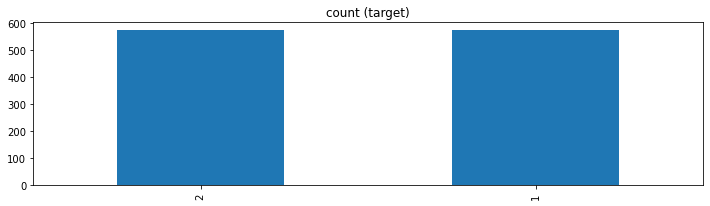

In [544]:
# random sample 575 samples from the no teen pregnancy group
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and 0:",test_under['pregnant'].value_counts())# plot the count after under-sampeling
test_under['pregnant'].value_counts().plot(kind='bar', title='count (target)');

In [545]:
X = test_under['confidence'].tolist()
y = test_under['pregnant'].tolist()
X = np.array(X).reshape(-1, 1)
y = np.array(y)-1

In [550]:
X.tolist().count([2])

112

Optimization terminated successfully.
         Current function value: 0.687839
         Iterations 4


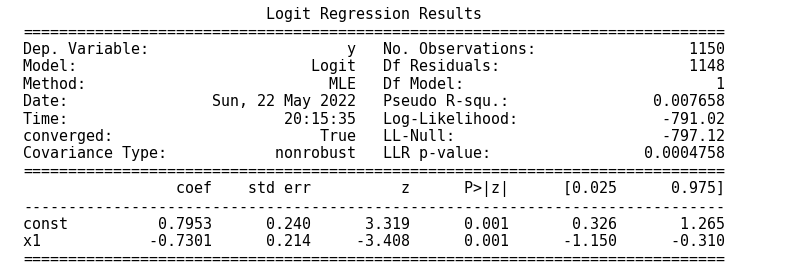

In [247]:
# apply statsmodel logistic regression model
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [249]:
# testing the second variable SES
df4 = df[['ses', 'pregnant']]

In [523]:
df4['ses'].mean()

0.15656271138669814

In [524]:
df4['ses'].median()

0.162

In [525]:
df4['ses'].std()

0.7903118284579984

In [561]:
# class count
class_count_0, class_count_1 = df4['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df4[df4['pregnant'] == 2] #not pregnant
class_1 = df4[df4['pregnant'] == 1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [562]:
X = test_under['ses'].tolist()
y = test_under['pregnant'].tolist()
X = np.array(X).reshape(-1, 1)

In [563]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)

SimpleImputer()

In [565]:
X = imp_mean.transform(X)
y = np.array(y)-1

In [537]:
X[:,0].mean()

0.2421310861423221

In [538]:
X[:,0].std()

0.759589930795713

In [539]:
X[:,0].var()

0.5769768629662361

In [540]:
X[:,0].min()

-1.779

In [541]:
X[:,0].max()

2.039

Optimization terminated successfully.
         Current function value: 0.637300
         Iterations 5


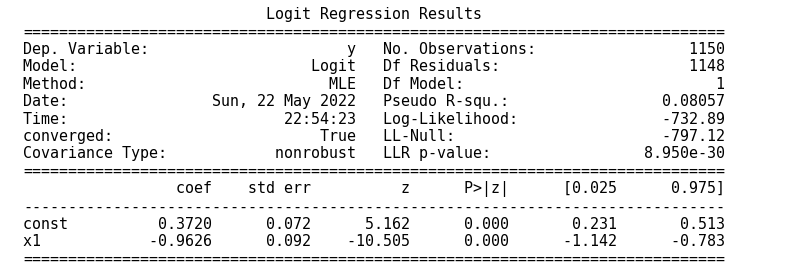

In [566]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [551]:
# testing the third variable family composite
df5 = df[['single_par', 'pregnant']]

In [552]:
class_count_0, class_count_1 = df5['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df5[df5['pregnant'] == 2] #not pregnant
class_1 = df5[df5['pregnant'] == 1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [553]:
X = test_under['single_par'].tolist()
y = test_under['pregnant'].tolist()
X = np.array(X).reshape(-1, 1)

In [555]:
X.tolist().count([1])

227

In [449]:
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.674905
         Iterations 5


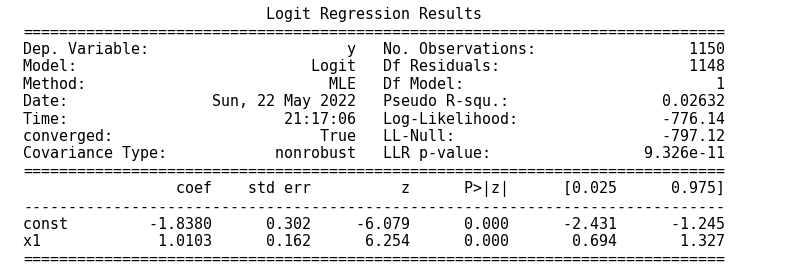

In [450]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

In [556]:
# testing the last variable communication
df6 = df[['comm', 'pregnant']]

In [557]:
class_count_0, class_count_1 = df6['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df6[df6['pregnant'] == 2] #not pregnant
class_1 = df6[df6['pregnant'] == 1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [558]:
X = test_under['comm'].tolist()
y = test_under['pregnant'].tolist()
X = np.array(X).reshape(-1, 1)

In [560]:
X.tolist().count([2])

667

In [494]:
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.685863
         Iterations 4


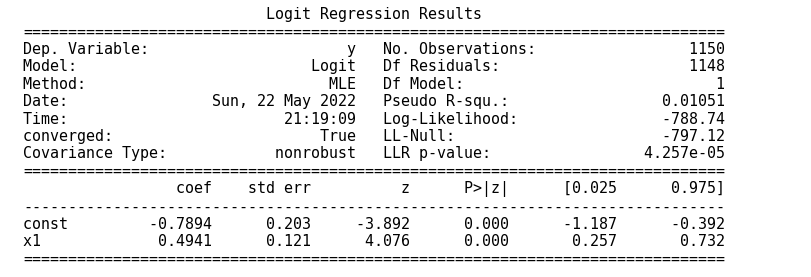

In [495]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

In [496]:
# add one variable to the single model that has the best performance
df7 = df[['pregnant', 'ses', 'comm']]

In [497]:
class_count_0, class_count_1 = df7['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df7[df7['pregnant'] ==2] #not pregnant
class_1 = df7[df7['pregnant'] ==1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [498]:
X = np.array(test_under[['ses', 'comm']])
y = test_under['pregnant'].tolist()

In [499]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X = imp_mean.transform(X)

In [500]:
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.640700
         Iterations 5


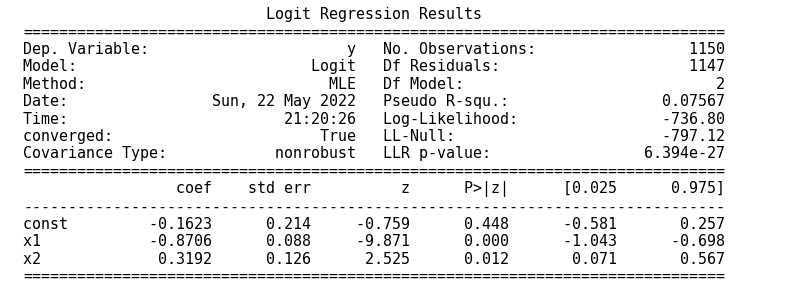

In [501]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()

In [502]:
#add the third variable to the model
df7 = df[['pregnant', 'ses', 'single_par', 'comm']]
class_count_0, class_count_1 = df7['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df7[df7['pregnant'] ==2] #not pregnant
class_1 = df7[df7['pregnant'] ==1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [503]:
X = np.array(test_under[['ses', 'single_par', 'comm']])
y = test_under['pregnant'].tolist()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.626285
         Iterations 5


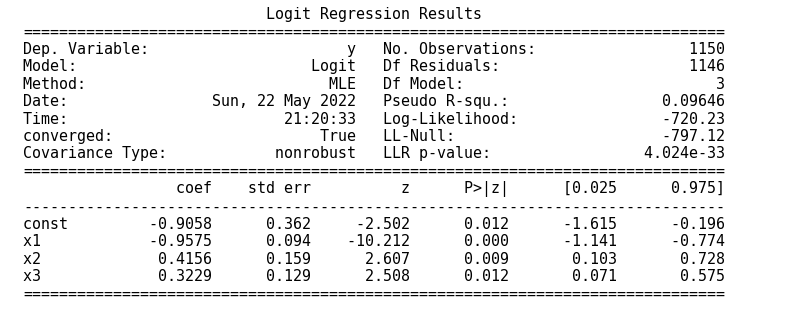

In [504]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

In [277]:
#add the last variable to the model
df7 = df[['pregnant', 'ses', 'single_par', 'comm', 'expectation']]
class_count_0, class_count_1 = df7['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df7[df7['pregnant'] ==2] #not pregnant
class_1 = df7[df7['pregnant'] ==1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [278]:
X = np.array(test_under[['ses', 'single_par', 'comm', 'expectation']])
y = test_under['pregnant'].tolist()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.639583
         Iterations 5


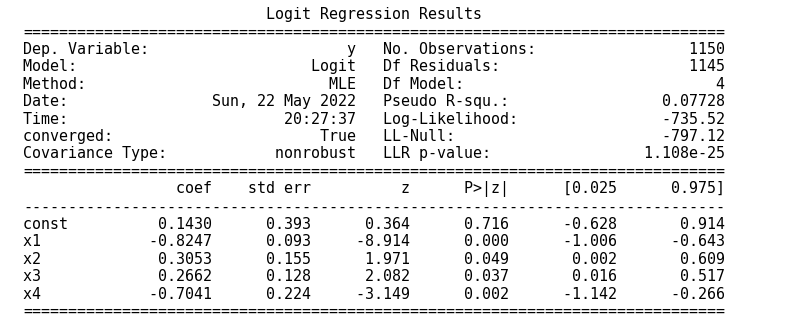

In [279]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

In [307]:
#show the racial composite of females with teen pregnancy
df8 = df2[(df2["pregnant"] == 1) ]

In [311]:
num_list = df8["BYS31A"].tolist()

In [312]:
# cound the racial composite 
asian = 0
hispanic = 0
black = 0
white = 0
native = 0
for x in num_list:
    if x==1:
        asian+=1
    elif x==2:
        hispanic +=1
    elif x ==3:
        black += 1
    elif x ==4:
        white += 1
    elif x ==5:
        native += 1

In [313]:
race_list = ['asian', 'hispanic', 'black', 'white', 'native']

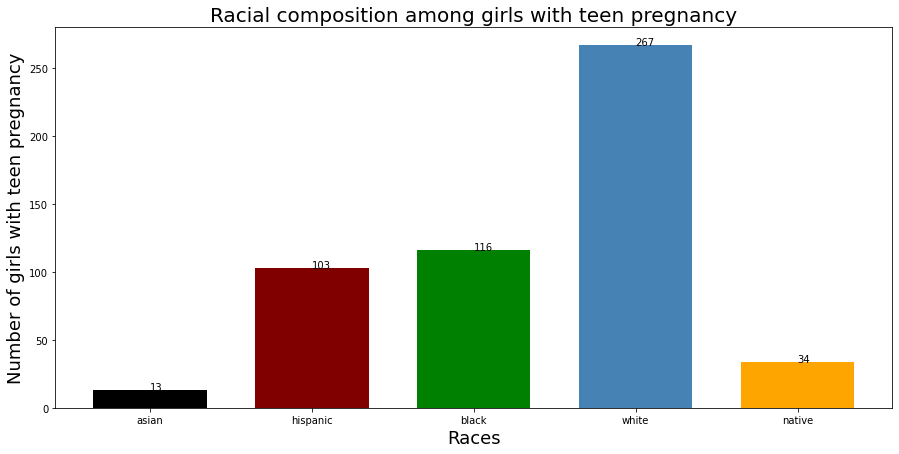

In [316]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure(figsize =(15,7));
addlabels(race_list, num_list);
plt.bar(race_list, num_list, color=['black', 'maroon', 'green', 'steelblue', 'orange'],width = 0.7);
plt.title('Racial composition among girls with teen pregnancy', fontsize=20);
plt.xlabel("Races", fontsize=18);
plt.ylabel("Number of girls with teen pregnancy", fontsize=18);

In [317]:
#focus on hispanic group for now
df8 = df2[(df2["BYS31A"] == 2) ]

In [318]:
df8

,confidence,pregnant,ses,single_par,comm,BYS31A
105,1,2,-0.605,1,2,2.0
131,1,2,0.252,2,1,2.0
133,1,2,0.994,2,2,2.0
134,1,2,1.404,2,2,2.0
135,1,2,1.702,2,1,2.0
...,...,...,...,...,...,...
7428,1,2,-1.234,2,1,2.0
7429,1,2,-0.028,1,1,2.0
7432,1,2,0.188,2,2,2.0
7433,1,2,0.072,1,2,2.0


In [319]:
#test the first predictor for this group
df9 = df8[['pregnant', 'ses']]

In [320]:
class_count_0, class_count_1 = df9['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df9[df9['pregnant'] == 2] #not pregnant
class_1 = df9[df9['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (870, 2)
class 1: (103, 2)


total class of 1 and 0: 2    103
1    103
Name: pregnant, dtype: int64


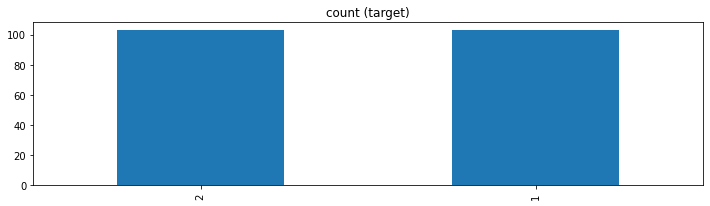

In [321]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("total class of 1 and 0:",test_under['pregnant'].value_counts())# plot the count after under-sampeling
test_under['pregnant'].value_counts().plot(kind='bar', title='count (target)');

In [322]:
X = np.array(test_under[['ses']])
y = test_under['pregnant'].tolist()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)

SimpleImputer()

Optimization terminated successfully.
         Current function value: 0.662062
         Iterations 5


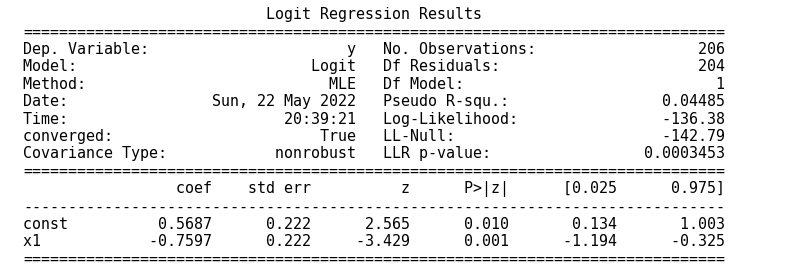

In [323]:
y = np.array(y)-1
X = imp_mean.transform(X)
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') 
plt.axis('off')
plt.tight_layout()

In [505]:
# add the second variable to the previous model
df9 = df8[['pregnant', 'ses', 'comm']]
class_count_0, class_count_1 = df9['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df9[df9['pregnant'] == 2] #not pregnant
class_1 = df9[df9['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (870, 3)
class 1: (103, 3)


In [507]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'comm']])
y = test_under['pregnant'].tolist()

In [508]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.651004
         Iterations 5


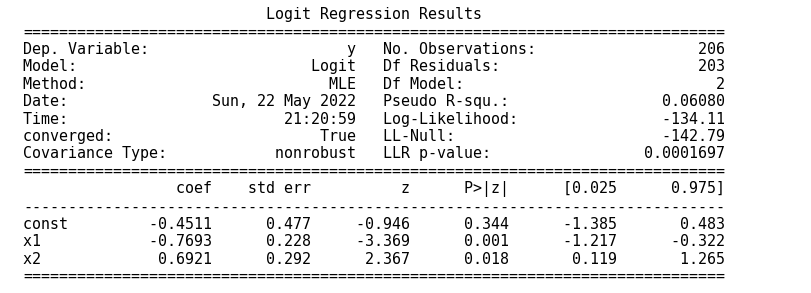

In [509]:
X = imp_mean.transform(X)
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [331]:
#add the third predictor to the model
df9 = df8[['pregnant', 'ses', 'single_par', 'comm']]
class_count_0, class_count_1 = df9['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df9[df9['pregnant'] == 2] #not pregnant
class_1 = df9[df9['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (870, 4)
class 1: (103, 4)


In [332]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'single_par', 'comm']])
y = test_under['pregnant'].tolist()

In [333]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.647892
         Iterations 5


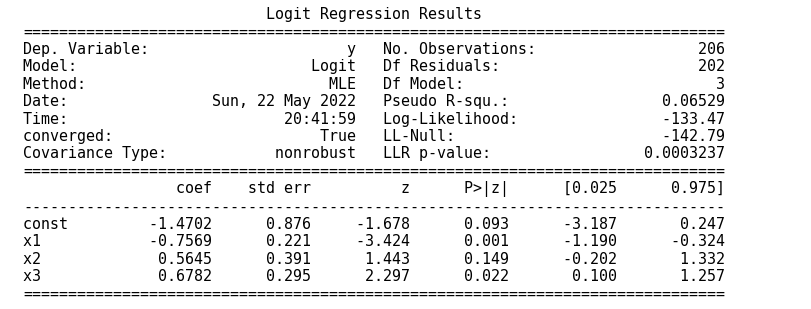

In [334]:
X = imp_mean.transform(X)
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [336]:
#add the last variable to the model
df9 = df8[['pregnant', 'ses', 'single_par', 'comm', 'confidence']]
class_count_0, class_count_1 = df9['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df9[df9['pregnant'] == 2] #not pregnant
class_1 = df9[df9['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (870, 5)
class 1: (103, 5)


In [338]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'single_par', 'comm', 'confidence']])
y = test_under['pregnant'].tolist()

In [339]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.639429
         Iterations 6


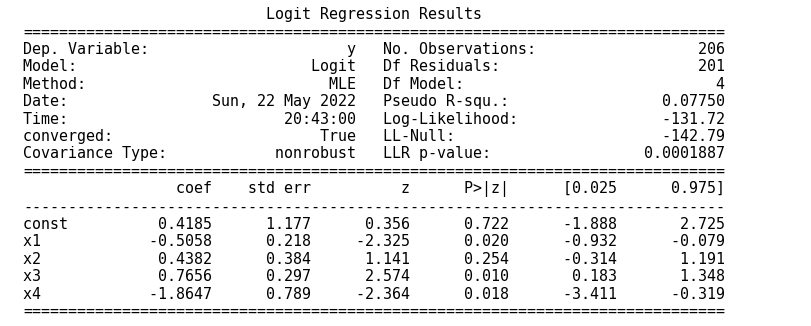

In [340]:
X = imp_mean.transform(X)
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [341]:
# analysis of black group
df10 = df2[(df2["BYS31A"] == 3) ]

In [342]:
df10

,confidence,pregnant,ses,single_par,comm,BYS31A
10,1,2,-0.205,2,1,3.0
76,1,2,-0.335,2,1,3.0
77,1,2,-0.835,1,1,3.0
78,1,2,-0.443,1,2,3.0
138,1,2,2.039,1,2,3.0
...,...,...,...,...,...,...
7426,1,2,0.868,2,1,3.0
7430,1,2,-0.053,2,1,3.0
7434,1,2,-0.683,2,2,3.0
7440,1,2,-0.533,2,2,3.0


In [343]:
df11 = df10[['pregnant', 'ses']]

In [344]:
class_count_0, class_count_1 = df11['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df11[df11['pregnant'] == 2] #not pregnant
class_1 = df11[df11['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (659, 2)
class 1: (116, 2)


In [345]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses']])
y = test_under['pregnant'].tolist()

In [346]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1

Optimization terminated successfully.
         Current function value: 0.658455
         Iterations 5


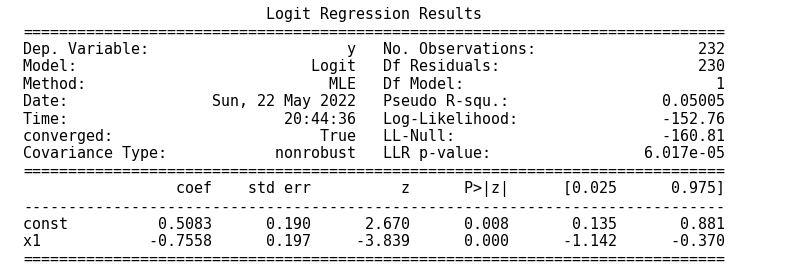

In [347]:
X = imp_mean.transform(X)
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [510]:
df11 = df10[['pregnant', 'ses', 'comm']]

In [511]:
class_count_0, class_count_1 = df11['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df11[df11['pregnant'] == 2] #not pregnant
class_1 = df11[df11['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (659, 3)
class 1: (116, 3)


In [512]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'comm']])
y = test_under['pregnant'].tolist()

In [513]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.666184
         Iterations 5


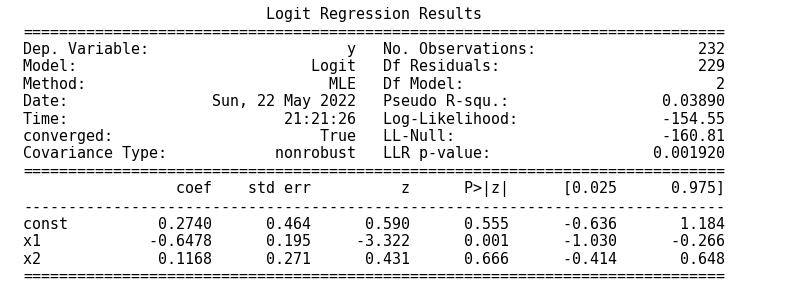

In [514]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [353]:
df11 = df10[['pregnant', 'ses', 'single_par', 'comm']]

In [354]:
class_count_0, class_count_1 = df11['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df11[df11['pregnant'] == 2] #not pregnant
class_1 = df11[df11['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (659, 4)
class 1: (116, 4)


In [355]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'single_par', 'comm']])
y = test_under['pregnant'].tolist()

In [356]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.629026
         Iterations 5


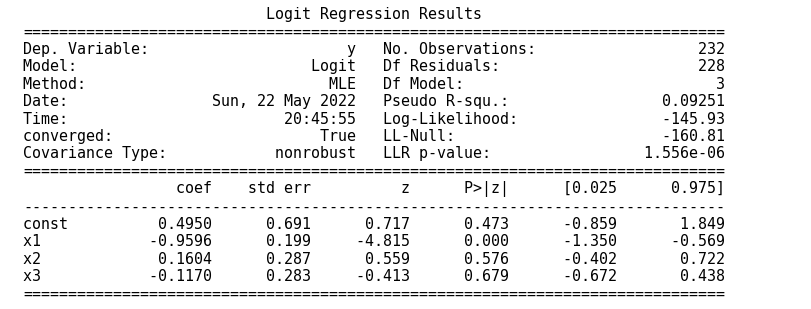

In [357]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [358]:
df11 = df10[['pregnant', 'ses', 'single_par', 'comm', 'confidence']]

In [359]:
class_count_0, class_count_1 = df11['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df11[df11['pregnant'] == 2] #not pregnant
class_1 = df11[df11['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (659, 5)
class 1: (116, 5)


In [361]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'single_par', 'comm', 'confidence']])
y = test_under['pregnant'].tolist()

In [362]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.639990
         Iterations 5


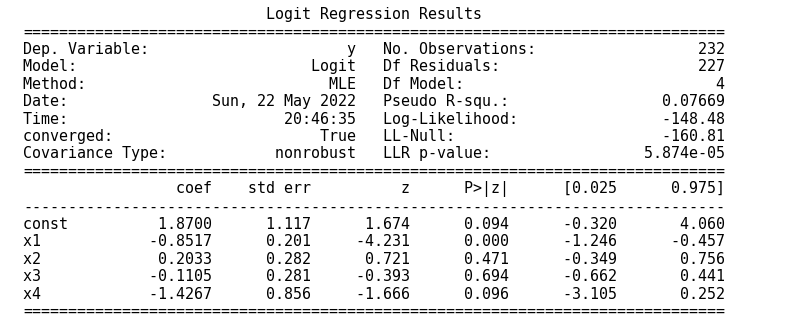

In [363]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [364]:
#analysis of white group
df12 = df2[(df2["BYS31A"] == 4) ]

In [365]:
df12

,confidence,pregnant,ses,single_par,comm,BYS31A
0,1,2,0.859,2,1,4.0
1,1,2,0.191,2,1,4.0
2,1,2,0.319,2,2,4.0
4,1,2,0.601,2,1,4.0
5,1,2,0.101,2,2,4.0
...,...,...,...,...,...,...
7494,1,2,-0.617,2,1,4.0
7495,1,2,-1.779,2,2,4.0
7496,1,2,-0.340,2,2,4.0
7498,1,2,-0.823,2,1,4.0


In [366]:
df13 = df12[['pregnant', 'ses']]

In [367]:
class_count_0, class_count_1 = df13['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df13[df13['pregnant'] == 2] #not pregnant
class_1 = df13[df13['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4269, 2)
class 1: (267, 2)


In [368]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses']])
y = test_under['pregnant'].tolist()

In [369]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.624126
         Iterations 5


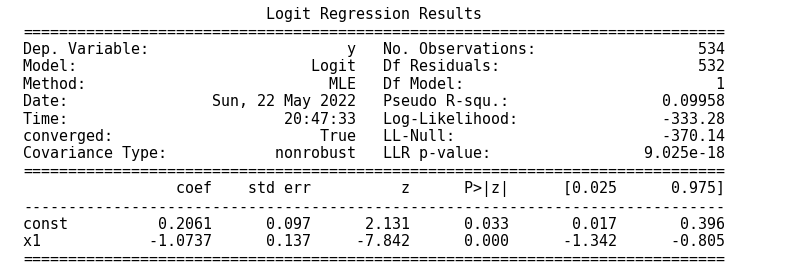

In [370]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [515]:
df13 = df12[['pregnant', 'ses', 'comm']]

In [516]:
class_count_0, class_count_1 = df13['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df13[df13['pregnant'] == 2] #not pregnant
class_1 = df13[df13['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4269, 3)
class 1: (267, 3)


In [518]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'comm']])
y = test_under['pregnant'].tolist()

In [519]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.648732
         Iterations 5


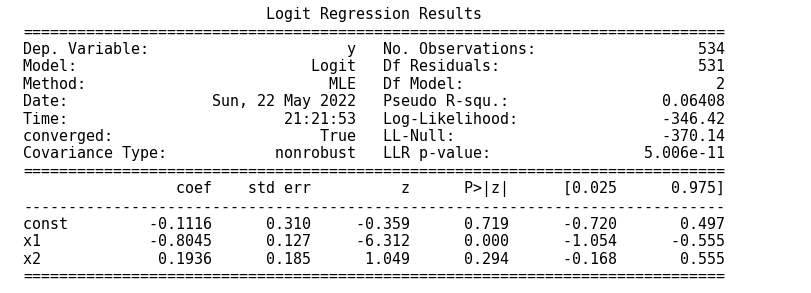

In [520]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [376]:
df13 = df12[['pregnant', 'ses', 'single_par', 'comm']]

In [377]:
class_count_0, class_count_1 = df13['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df13[df13['pregnant'] == 2] #not pregnant
class_1 = df13[df13['pregnant'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4269, 4)
class 1: (267, 4)


In [378]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
X = np.array(test_under[['ses', 'single_par', 'comm']])
y = test_under['pregnant'].tolist()

In [379]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.631362
         Iterations 5


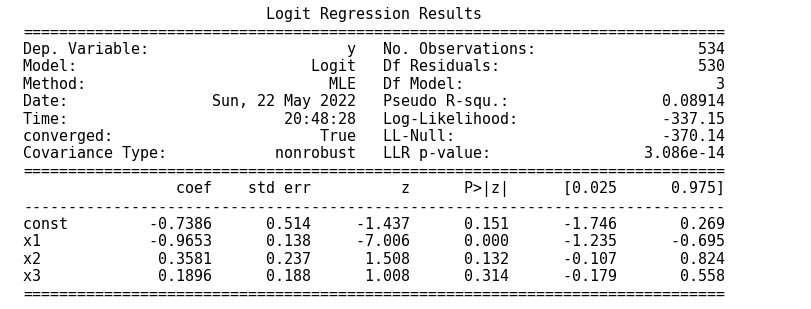

In [380]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()

In [381]:
df13 = df12[['pregnant', 'ses', 'single_par', 'comm', 'confidence']]

In [382]:
class_count_0, class_count_1 = df13['pregnant'].value_counts()
#class0 means not pregnant
# Separate class
class_0 = df13[df13['pregnant'] == 2] #not pregnant
class_1 = df13[df13['pregnant'] == 1]
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [383]:
X = np.array(test_under[['ses', 'single_par', 'comm', 'confidence']])
y = test_under['pregnant'].tolist()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
y = np.array(y)-1
X = imp_mean.transform(X)

Optimization terminated successfully.
         Current function value: 0.608083
         Iterations 5


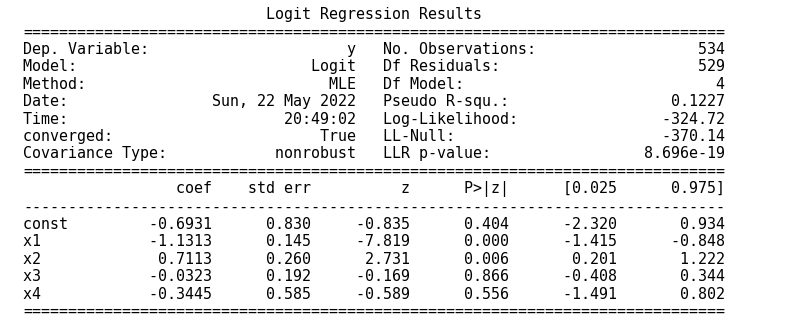

In [384]:
log_reg = sd.Logit(y, sd.add_constant(X)).fit()
plt.rc('figure', figsize=(12, 3))
plt.text(0.02, 0.07, str(log_reg.summary()), {'fontsize': 15}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()